# Problem Statement:
A bank wants to predict whether a customer will subscribe to a term deposit after a marketing call campaign.    
This is a Supervised Machine Learning – Classification Problem  
Because We have labeled data    
Target variable is categorical (Yes/No)

# DataSet Description
customer_age : Age of the customer

job_type : Type of occupation or job category of the customer

marital_status : Marital status of the customer (married, single, divorced)

education_level : Highest education qualification of the customer

credit_default : Whether the customer has credit in default

has_housing_loan : Indicates if the customer has a housing loan

has_personal_loan : Indicates if the customer has a personal loan

contact_type : Communication method used to contact the customer (cellular or telephone)

last_contact_month : Month when the customer was last contacted

last_contact_day : Day of the week when the last contact occurred

call_duration_sec : Duration of the last marketing call in seconds

campaign_contacts : Number of contacts performed during the current marketing campaign

days_since_last_contact : Number of days since the customer was last contacted (999 means never contacted before)

previous_contacts : Number of contacts performed before the current campaign

previous_campaign_outcome : Result of the previous marketing campaign (success, failure, nonexistent)

employment_variation_rate : Quarterly employment variation rate (economic indicator)

consumer_price_index : Consumer price index representing inflation level

consumer_confidence_index : Consumer confidence index reflecting economic sentiment

euribor_3m_rate : Euribor 3-month interest rate indicator

number_of_employees : Total number of employees in the economy (economic indicator)

subscription : Target variable indicating whether the customer subscribed to a term deposit (yes/no)

# Import Required Libraries

In [728]:
# Basic libraries for data handling
import pandas as pd         # dataset handling
import numpy as np          # numerical operations

# for visualization 
import matplotlib.pyplot as plt
import seaborn as sns

# for machine learning 
from sklearn.preprocessing import LabelEncoder, StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
# for balancing the imbalance class
from imblearn.over_sampling import SMOTE
import joblib

# for model training
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#### Load the dataset

In [729]:
df = pd.read_csv('bank-additional-full.csv')

In [730]:
df.rename(columns={
    "age": "customer_age",
    "job": "job_type",
    "marital": "marital_status",
    "education": "education_level",
    "default": "credit_default",
    "housing": "has_housing_loan",
    "loan": "has_personal_loan",
    "contact": "contact_type",
    "month": "last_contact_month",
    "day_of_week": "last_contact_day",
    "duration": "call_duration_sec",
    "campaign": "campaign_contacts",
    "pdays": "days_since_last_contact",
    "previous": "previous_contacts",
    "poutcome": "previous_campaign_outcome",
    "emp.var.rate": "employment_variation_rate",
    "cons.price.idx": "consumer_price_index",
    "cons.conf.idx": "consumer_confidence_index",
    "euribor3m": "euribor_3m_rate",
    "nr.employed": "number_of_employees",
    "y": "subscription"
}, inplace=True)

In [731]:
# Check column names
df.columns

Index(['customer_age', 'job_type', 'marital_status', 'education_level',
       'credit_default', 'has_housing_loan', 'has_personal_loan',
       'contact_type', 'last_contact_month', 'last_contact_day',
       'call_duration_sec', 'campaign_contacts', 'days_since_last_contact',
       'previous_contacts', 'previous_campaign_outcome',
       'employment_variation_rate', 'consumer_price_index',
       'consumer_confidence_index', 'euribor_3m_rate', 'number_of_employees',
       'subscription'],
      dtype='object')

In [732]:
# check number of rows and columns
df.shape

(41188, 21)

The dataset contains around 41,000+ rows and 21 columns.

In [733]:
# Show first 5 rows
df.head(5)

,customer_age,job_type,marital_status,education_level,credit_default,has_housing_loan,has_personal_loan,contact_type,last_contact_month,last_contact_day,...,campaign_contacts,days_since_last_contact,previous_contacts,previous_campaign_outcome,employment_variation_rate,consumer_price_index,consumer_confidence_index,euribor_3m_rate,number_of_employees,subscription
0,56,housemaid,married,basic,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


We can see columns like customer_age, job_type, marital_status, education_level, and subscription (target).
The dataset contains both numerical and categorical features.
The target variable contains binary values (yes/no), making it suitable for classification.

In [734]:
# Check data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_age               41188 non-null  int64  
 1   job_type                   41188 non-null  object 
 2   marital_status             41188 non-null  object 
 3   education_level            41188 non-null  object 
 4   credit_default             41188 non-null  object 
 5   has_housing_loan           41188 non-null  object 
 6   has_personal_loan          41188 non-null  object 
 7   contact_type               41188 non-null  object 
 8   last_contact_month         41188 non-null  object 
 9   last_contact_day           41188 non-null  object 
 10  call_duration_sec          41188 non-null  int64  
 11  campaign_contacts          41188 non-null  int64  
 12  days_since_last_contact    41188 non-null  int64  
 13  previous_contacts          41188 non-null  int

Some columns are numerical (int/float) while others are categorical (object).   
No immediate missing values are visible, but we must verify further.    
Target variable is object type and must be encoded later.   
Several macroeconomic features are continuous numeric values.   

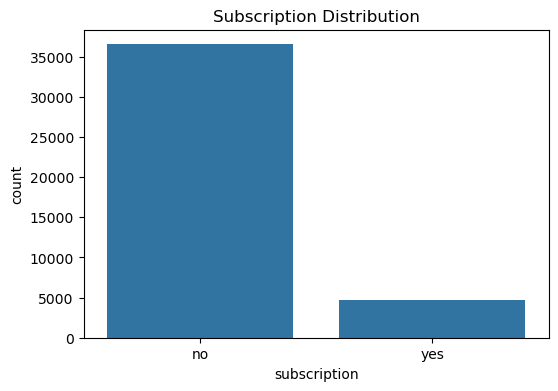

In [735]:
plt.figure(figsize=(6,4))
sns.countplot(x='subscription', data=df)
plt.title("Subscription Distribution")
plt.show()

The graph clearly shows heavy class imbalance.
Most customers did not subscribe, while a smaller portion subscribed.
This imbalance may cause model bias toward majority class.
SMOTE will be required later to balance classes.

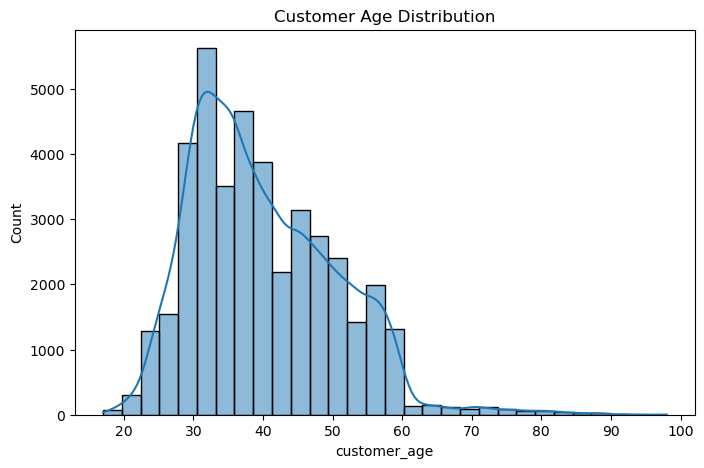

In [736]:
plt.figure(figsize=(8,5))
sns.histplot(df['customer_age'], bins=30, kde=True)
plt.title("Customer Age Distribution")
plt.show()

Most customers are between 30 and 50 years old.
The distribution is slightly right-skewed.
Few customers are above 70 years old.

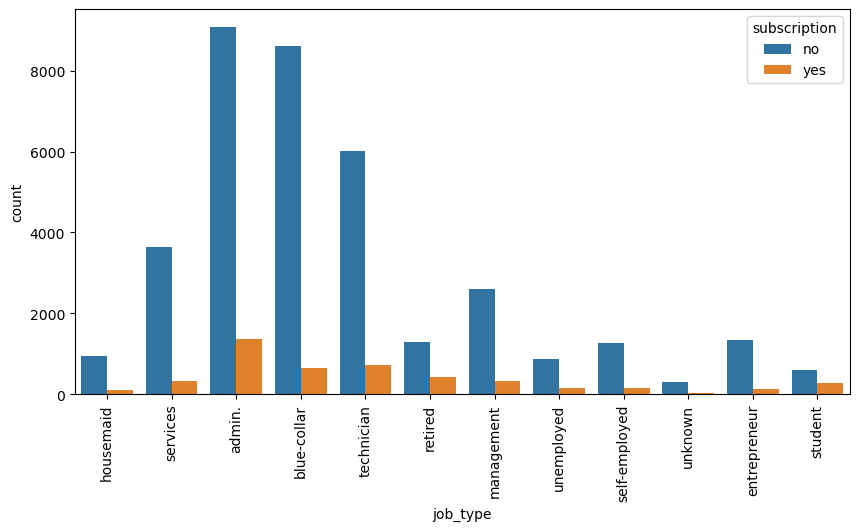

In [737]:
# Job Type & Subscription
plt.figure(figsize=(10,5))
sns.countplot(x='job_type', hue='subscription', data=df)
plt.xticks(rotation=90)
plt.show()

# DATA CLEANING

Remove Duplicates

In [738]:
df.duplicated().sum()

np.int64(15)

In [739]:
df = df.drop_duplicates()

In [740]:
# Check Null Values
df.isnull().sum()

customer_age                 0
job_type                     0
marital_status               0
education_level              0
credit_default               0
has_housing_loan             0
has_personal_loan            0
contact_type                 0
last_contact_month           0
last_contact_day             0
call_duration_sec            0
campaign_contacts            0
days_since_last_contact      0
previous_contacts            0
previous_campaign_outcome    0
employment_variation_rate    0
consumer_price_index         0
consumer_confidence_index    0
euribor_3m_rate              0
number_of_employees          0
subscription                 0
dtype: int64

* no missing values found

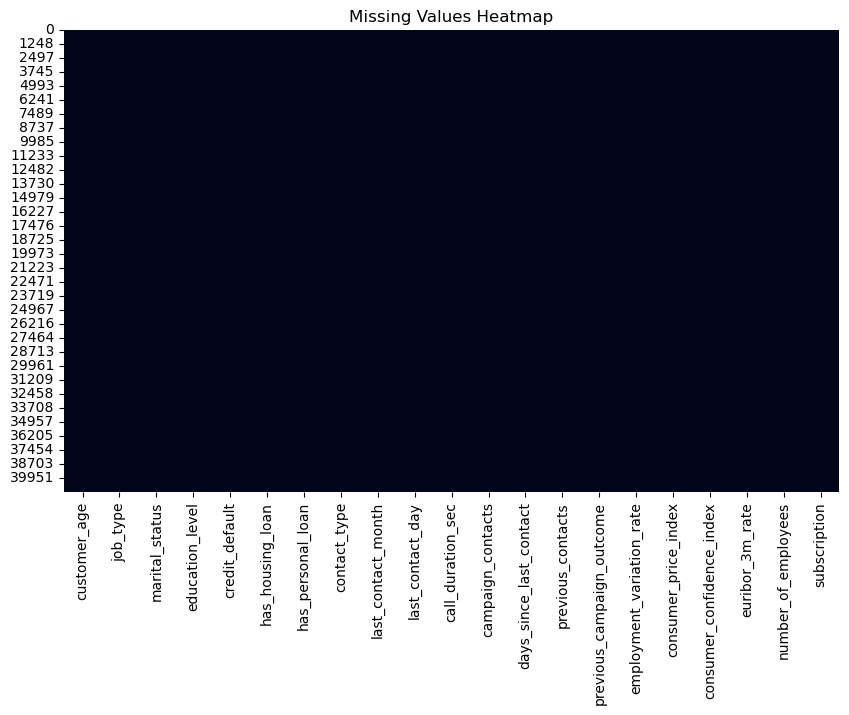

In [741]:
# Visualize Missing values
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

In [742]:
# Check unknown values in each column
for col in df.columns:
    if df[col].dtype == "object":
        print(col, ":", (df[col] == "unknown").sum())

job_type : 330
marital_status : 80
education_level : 1730
credit_default : 8596
has_housing_loan : 990
has_personal_loan : 990
contact_type : 0
last_contact_month : 0
last_contact_day : 0
previous_campaign_outcome : 0
subscription : 0


In [743]:
# Replace unknown ONLY in categorical columns EXCEPT subscription
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    if col != 'y':  # avoid touching target
        df[col] = df[col].replace('unknown', df[col].mode()[0])

In [744]:
# Recheck unknown values in each column
for col in df.columns:
    if df[col].dtype == "object":
        print(col, ":", (df[col] == "unknown").sum())

job_type : 0
marital_status : 0
education_level : 0
credit_default : 0
has_housing_loan : 0
has_personal_loan : 0
contact_type : 0
last_contact_month : 0
last_contact_day : 0
previous_campaign_outcome : 0
subscription : 0


All "unknown" values are now replaced with the most frequent category in each column.
This ensures no data loss while maintaining dataset size.
Replacing with mode is suitable for categorical features.

#### Remove Duplicates

In [745]:
# Check duplicate
df.duplicated().sum()

np.int64(2)

In [746]:
# Remove duplicate 
df = df.drop_duplicates()

In [747]:
# Recheck duplicate
df.duplicated().sum()

np.int64(0)

#### Datatype conversion

In [748]:
# Check data type
df.dtypes

customer_age                   int64
job_type                      object
marital_status                object
education_level               object
credit_default                object
has_housing_loan              object
has_personal_loan             object
contact_type                  object
last_contact_month            object
last_contact_day              object
call_duration_sec              int64
campaign_contacts              int64
days_since_last_contact        int64
previous_contacts              int64
previous_campaign_outcome     object
employment_variation_rate    float64
consumer_price_index         float64
consumer_confidence_index    float64
euribor_3m_rate              float64
number_of_employees          float64
subscription                  object
dtype: object

In [749]:
# Convert target variable into numeric
df['subscription'] = df['subscription'].map({'yes': 1, 'no': 0})

In [750]:
# Recheck data type
df.dtypes

customer_age                   int64
job_type                      object
marital_status                object
education_level               object
credit_default                object
has_housing_loan              object
has_personal_loan             object
contact_type                  object
last_contact_month            object
last_contact_day              object
call_duration_sec              int64
campaign_contacts              int64
days_since_last_contact        int64
previous_contacts              int64
previous_campaign_outcome     object
employment_variation_rate    float64
consumer_price_index         float64
consumer_confidence_index    float64
euribor_3m_rate              float64
number_of_employees          float64
subscription                   int64
dtype: object

In [751]:
# Check Class Distribution
print(df['subscription'].value_counts())

subscription
0    36532
1     4639
Name: count, dtype: int64


In [752]:
# Separate Numerical & Categorical Variables
num_cols = df.select_dtypes(include=['int64','float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

In [753]:
num_cols

Index(['customer_age', 'call_duration_sec', 'campaign_contacts',
       'days_since_last_contact', 'previous_contacts',
       'employment_variation_rate', 'consumer_price_index',
       'consumer_confidence_index', 'euribor_3m_rate', 'number_of_employees',
       'subscription'],
      dtype='object')

In [754]:
cat_cols

Index(['job_type', 'marital_status', 'education_level', 'credit_default',
       'has_housing_loan', 'has_personal_loan', 'contact_type',
       'last_contact_month', 'last_contact_day', 'previous_campaign_outcome'],
      dtype='object')

In [755]:
# Handle Skewness (Safe Method – NO Row Deletion)
numerical_cols = df.select_dtypes(include=['int64','float64']).columns
print(df[numerical_cols].skew().sort_values(ascending=False))

campaign_contacts            4.761822
previous_contacts            3.831532
call_duration_sec            3.262653
subscription                 2.449979
customer_age                 0.784681
consumer_confidence_index    0.302889
consumer_price_index        -0.230990
euribor_3m_rate             -0.709348
employment_variation_rate   -0.724209
number_of_employees         -1.044461
days_since_last_contact     -4.921052
dtype: float64


#### Observation

call_duration_sec usually shows high positive skewness.
campaign_contacts may show moderate skew.
Macroeconomic variables show low skew.
Not all features need transformation.

In [756]:
# Apply Log Transformation Only Where Needed
for col in numerical_cols:
    if df[col].skew() > 1:
        df[col] = np.log1p(df[col])

In [757]:
# Re-check Skewness
numerical_cols = df.select_dtypes(include=['int64','float64']).columns
print(df[numerical_cols].skew().sort_values(ascending=False))

previous_contacts            2.586641
subscription                 2.449979
campaign_contacts            1.350139
customer_age                 0.784681
consumer_confidence_index    0.302889
consumer_price_index        -0.230990
call_duration_sec           -0.421583
euribor_3m_rate             -0.709348
employment_variation_rate   -0.724209
number_of_employees         -1.044461
days_since_last_contact     -4.921052
dtype: float64


Highly skewed features now look more symmetric.
No rows were removed.
Class balance remains intact.
Model performance for linear algorithms will improve.

In [758]:
print(df['subscription'].dtype)
print(df['subscription'].unique())

float64
[0.         0.69314718]


In [759]:
# Restore Target Variable (fixing the 0 & o.69 to 0 & 1)
df['subscription'] = df['subscription'].apply(
    lambda x: 1 if x > 0 else 0
)

print(df['subscription'].unique())

[0 1]


In [760]:
print(df['subscription'].value_counts())

subscription
0    36532
1     4639
Name: count, dtype: int64


#### Separate X & y 

In [761]:
# Separate features and target
X = df.drop('subscription', axis=1)
y = df['subscription']


In [762]:
# to check X is a pandas DataFrame or NumPy array
print(type(X))

<class 'pandas.core.frame.DataFrame'>


In [763]:
print("X shape:", X.shape)
print("y distribution:\n", y.value_counts())

X shape: (41171, 20)
y distribution:
 subscription
0    36532
1     4639
Name: count, dtype: int64


X contains all independent features used for prediction.    
y contains only the binary target variable (0 and 1).       
The class distribution likely shows more 0s than 1s.
This confirms the dataset is imbalanced and requires balancing.

## Check Class Imbalance Properly

Class Distribution:
 subscription
0    36532
1     4639
Name: count, dtype: int64


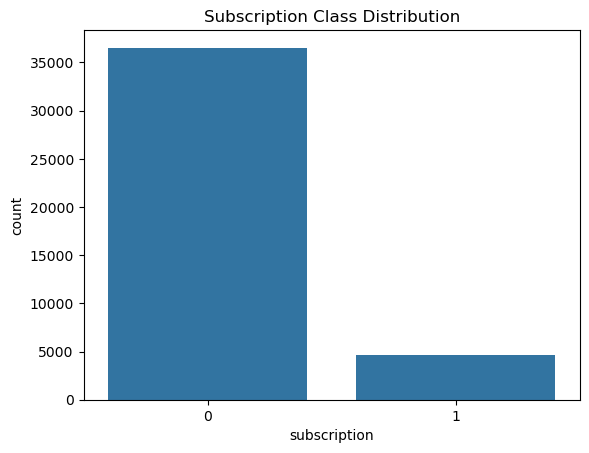

In [764]:
print("Class Distribution:\n", y.value_counts())

sns.countplot(x=y)
plt.title("Subscription Class Distribution")
plt.show()

The majority class (0 = No subscription) is much higher than minority class (1 = Yes).  
This imbalance can cause the model to predict mostly class 0.   
Accuracy may look high but recall for class 1 will be poor. 
Therefore, we need to apply SMOTE to balance the training data.

## Train-Test Split (Before Balancing)

In [765]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [766]:
y_train.value_counts()

subscription
0    29225
1     3711
Name: count, dtype: int64

In [767]:
y_test.value_counts()

subscription
0    7307
1     928
Name: count, dtype: int64

Both training and testing sets preserve original class ratio.   
This ensures fair evaluation.   
The test set remains untouched and imbalanced.  
We will apply SMOTE only on the training set.

### Separate Numerical & Categorical Features

In [768]:
numerical_cols = X_train.select_dtypes(include=['int64','float64']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns


In [769]:
numerical_cols

Index(['customer_age', 'call_duration_sec', 'campaign_contacts',
       'days_since_last_contact', 'previous_contacts',
       'employment_variation_rate', 'consumer_price_index',
       'consumer_confidence_index', 'euribor_3m_rate', 'number_of_employees'],
      dtype='object')

In [770]:
categorical_cols

Index(['job_type', 'marital_status', 'education_level', 'credit_default',
       'has_housing_loan', 'has_personal_loan', 'contact_type',
       'last_contact_month', 'last_contact_day', 'previous_campaign_outcome'],
      dtype='object')

## Encoding

In [771]:
# Identify categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
    ]
)


In [772]:
# to check X_train is a pandas DataFrame or NumPy array
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


In [773]:
# Fit ONLY on training data
X_train_processed = preprocessor.fit_transform(X_train)

# Transform test data
X_test_processed = preprocessor.transform(X_test)

In [774]:
# to check X_train is a pandas DataFrame or NumPy array
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


In [775]:
# to check X_train_processed is a pandas DataFrame or NumPy array
print(type(X_train_processed))

<class 'numpy.ndarray'>


## Balance Dataset Using SMOTE (Only Training Data)

In [776]:
sm = SMOTE(random_state=42)

In [777]:
X_train_resampled, y_train_resampled = sm.fit_resample(
    X_train_processed, y_train
)

In [778]:
print("Before SMOTE:\n", y_train.value_counts())
print("After SMOTE:\n", y_train_resampled.value_counts())

Before SMOTE:
 subscription
0    29225
1     3711
Name: count, dtype: int64
After SMOTE:
 subscription
0    29225
1    29225
Name: count, dtype: int64


Before SMOTE, class 0 dominates class 1.    
After SMOTE, both classes have equal samples.   
Synthetic minority samples are generated safely.    
The model will now learn both classes equally well.

# Model Building

In [779]:
# Create Model Dictionary
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier()
}

In [780]:
# Train Models Safely (Auto Skip Errors)
results = {}

for name, model in models.items():
    print(f"\n🔹 Training {name}...")
    
    try:
        model.fit(X_train_resampled, y_train_resampled)
        
        y_pred = model.predict(X_test_processed)
        
        accuracy = accuracy_score(y_test, y_pred)
        
        print("Accuracy:", accuracy)
        print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
        print("Classification Report:\n", classification_report(y_test, y_pred))
        
        results[name] = accuracy
        
    except Exception as e:
        print(f"{name} failed due to error: {e}")
        print("Skipping this model...\n")


🔹 Training Logistic Regression...
Accuracy: 0.8622950819672132
Confusion Matrix:
 [[6267 1040]
 [  94  834]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.86      0.92      7307
           1       0.45      0.90      0.60       928

    accuracy                           0.86      8235
   macro avg       0.72      0.88      0.76      8235
weighted avg       0.92      0.86      0.88      8235


🔹 Training Decision Tree...
Accuracy: 0.8817243472981178
Confusion Matrix:
 [[6756  551]
 [ 423  505]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93      7307
           1       0.48      0.54      0.51       928

    accuracy                           0.88      8235
   macro avg       0.71      0.73      0.72      8235
weighted avg       0.89      0.88      0.89      8235


🔹 Training Random Forest...
Accuracy: 0.9061323618700667
Confusion Matrix:
 [[6874 

#### What This Code Does

Trains each model

If any model gives error → it automatically skips

Stores accuracy of successful models

Prints full evaluation

In [781]:
# Compare Models
print("\n Model Comparison:")
for model, score in results.items():
    print(f"{model}: {score}")


 Model Comparison:
Logistic Regression: 0.8622950819672132
Decision Tree: 0.8817243472981178
Random Forest: 0.9061323618700667
KNN: 0.848816029143898


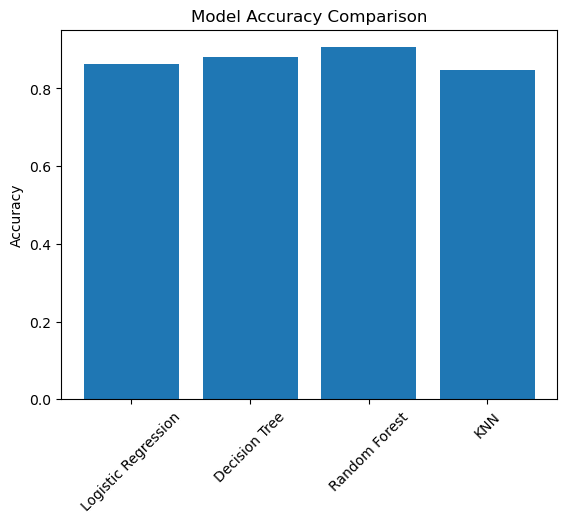

In [782]:
# Visualize Model Accuracy
plt.figure()
plt.bar(results.keys(), results.values())
plt.xticks(rotation=45)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()

### Observation 

1.Random Forest achieved the highest accuracy (90.61%), indicating that ensemble learning works best for this dataset.

2.Logistic Regression performed decently but is limited because it assumes linear relationships between features and target.

3.Decision Tree performed better than Logistic Regression but slightly lower than Random Forest, likely due to overfitting tendencies.

4.KNN showed the lowest performance among the four models, possibly because high-dimensional OneHotEncoded features reduce distance-based model effectiveness.

## Final Selected Model 
RandomForestClassifier

Because:    
Highest accuracy    
Handles non-linearity   
Handles categorical encoded features well   
Robust against overfitting compared to Decision Tree

#### ROC-AUC Curve (Model Evaluation Improvement)

In [783]:
# Get probability predictions
y_prob = models["Random Forest"].predict_proba(X_test_processed)[:,1]

roc_score = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_score)

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

ROC-AUC Score: 0.9431207173801222


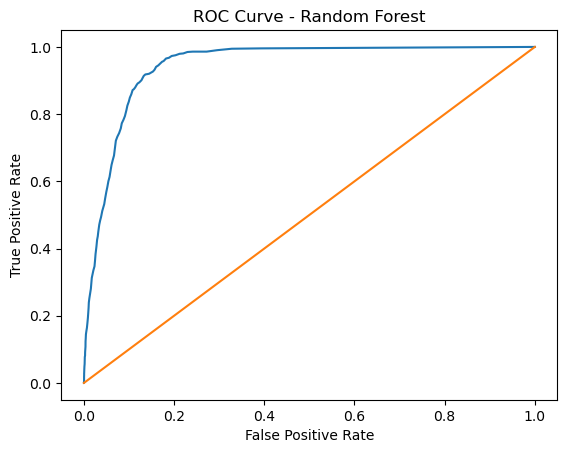

In [784]:
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1])
plt.title("ROC Curve - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

#### Observation

If ROC-AUC > 0.90 → Excellent model 
Curve closer to top-left corner → Strong classification ability

### Feature Importance

In [785]:
feature_names = preprocessor.get_feature_names_out()

importance = models["Random Forest"].feature_importances_

feature_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importance
}).sort_values(by="Importance", ascending=False)

In [786]:
print(feature_importance_df.head(10))

                           Feature  Importance
1           num__call_duration_sec    0.362056
8             num__euribor_3m_rate    0.100552
9         num__number_of_employees    0.074414
0                num__customer_age    0.043996
5   num__employment_variation_rate    0.037188
2           num__campaign_contacts    0.034753
7   num__consumer_confidence_index    0.026995
29     cat__contact_type_telephone    0.026393
6        num__consumer_price_index    0.024574
27       cat__has_housing_loan_yes    0.021546


Usually important features are:     
call_duration_sec       
euribor_3m_rate     
consumer_confidence_index   
employment_variation_rate   

This tells us economic indicators and call duration strongly affect subscription.

### Hyperparameter Tuning (Improve Further)

In [787]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=3,
    scoring='accuracy'
)

grid.fit(X_train_resampled, y_train_resampled)

,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [None, 10, ...], 'min_samples_split': [2, 5], 'n_estimators': [100, 200]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


In [788]:
print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.9527462636168847


### Save Final Model

In [789]:
joblib.dump(grid.best_estimator_, "bank_subscription_model.pkl")
joblib.dump(preprocessor, "preprocessor.pkl")

['preprocessor.pkl']